# Khai báo thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# If your charts have some problems, let see libraries version in requirements.txt based on Python 3.10.
# Uncomment to install libraries by command:
# !pip install -r requirements.txt

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [3]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 320 # 100 dpi hơi mờ nhé, chuẩn đăng bài Fanpage là từ 320dpi rồi.

Đọc dữ liệu

In [4]:
train = pd.read_csv('../data/train_preprocessed_DK.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc-missing
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,False
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,False
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4,False
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,289,16,121,4,1.777778,1.0,121.0,289,4,False
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,False


In [5]:
test = pd.read_csv('../data/test_preprocessed_DK.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,rez_esc-missing
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,...,0,16,9,0,1,2.25,0.25,272.25,16,False
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,...,256,1681,9,0,1,2.25,0.25,272.25,1681,False
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,...,289,1681,9,0,1,2.25,0.25,272.25,1681,False
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,...,256,3481,1,256,0,1.00,0.00,256.00,3481,False
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,121,324,1,0,1,0.25,64.00,NaN,324,False


In [6]:
all_data = pd.concat((train, test)).reset_index(drop=True)

# Khám phá dữ liệu

## Độ tuổi của mọi người

In [7]:
age_data = all_data[['age']].copy()
age_data['bin_age'] = age_data['age']
age_data.loc[age_data['age'] < 6, 'bin_age'] = 'Dưới 5 tuổi'
age_data.loc[age_data['age'] >= 18, 'bin_age'] = 'Trên 18 tuổi'
age_data.loc[(age_data['age'] >= 6) & (age_data['age'] < 18), 'bin_age'] = 'Từ 6 đến 17 tuổi'
age_data.sample(5)

,age,bin_age
4688,86,Trên 18 tuổi
24186,10,Từ 6 đến 17 tuổi
9465,53,Trên 18 tuổi
18202,8,Từ 6 đến 17 tuổi
28744,9,Từ 6 đến 17 tuổi


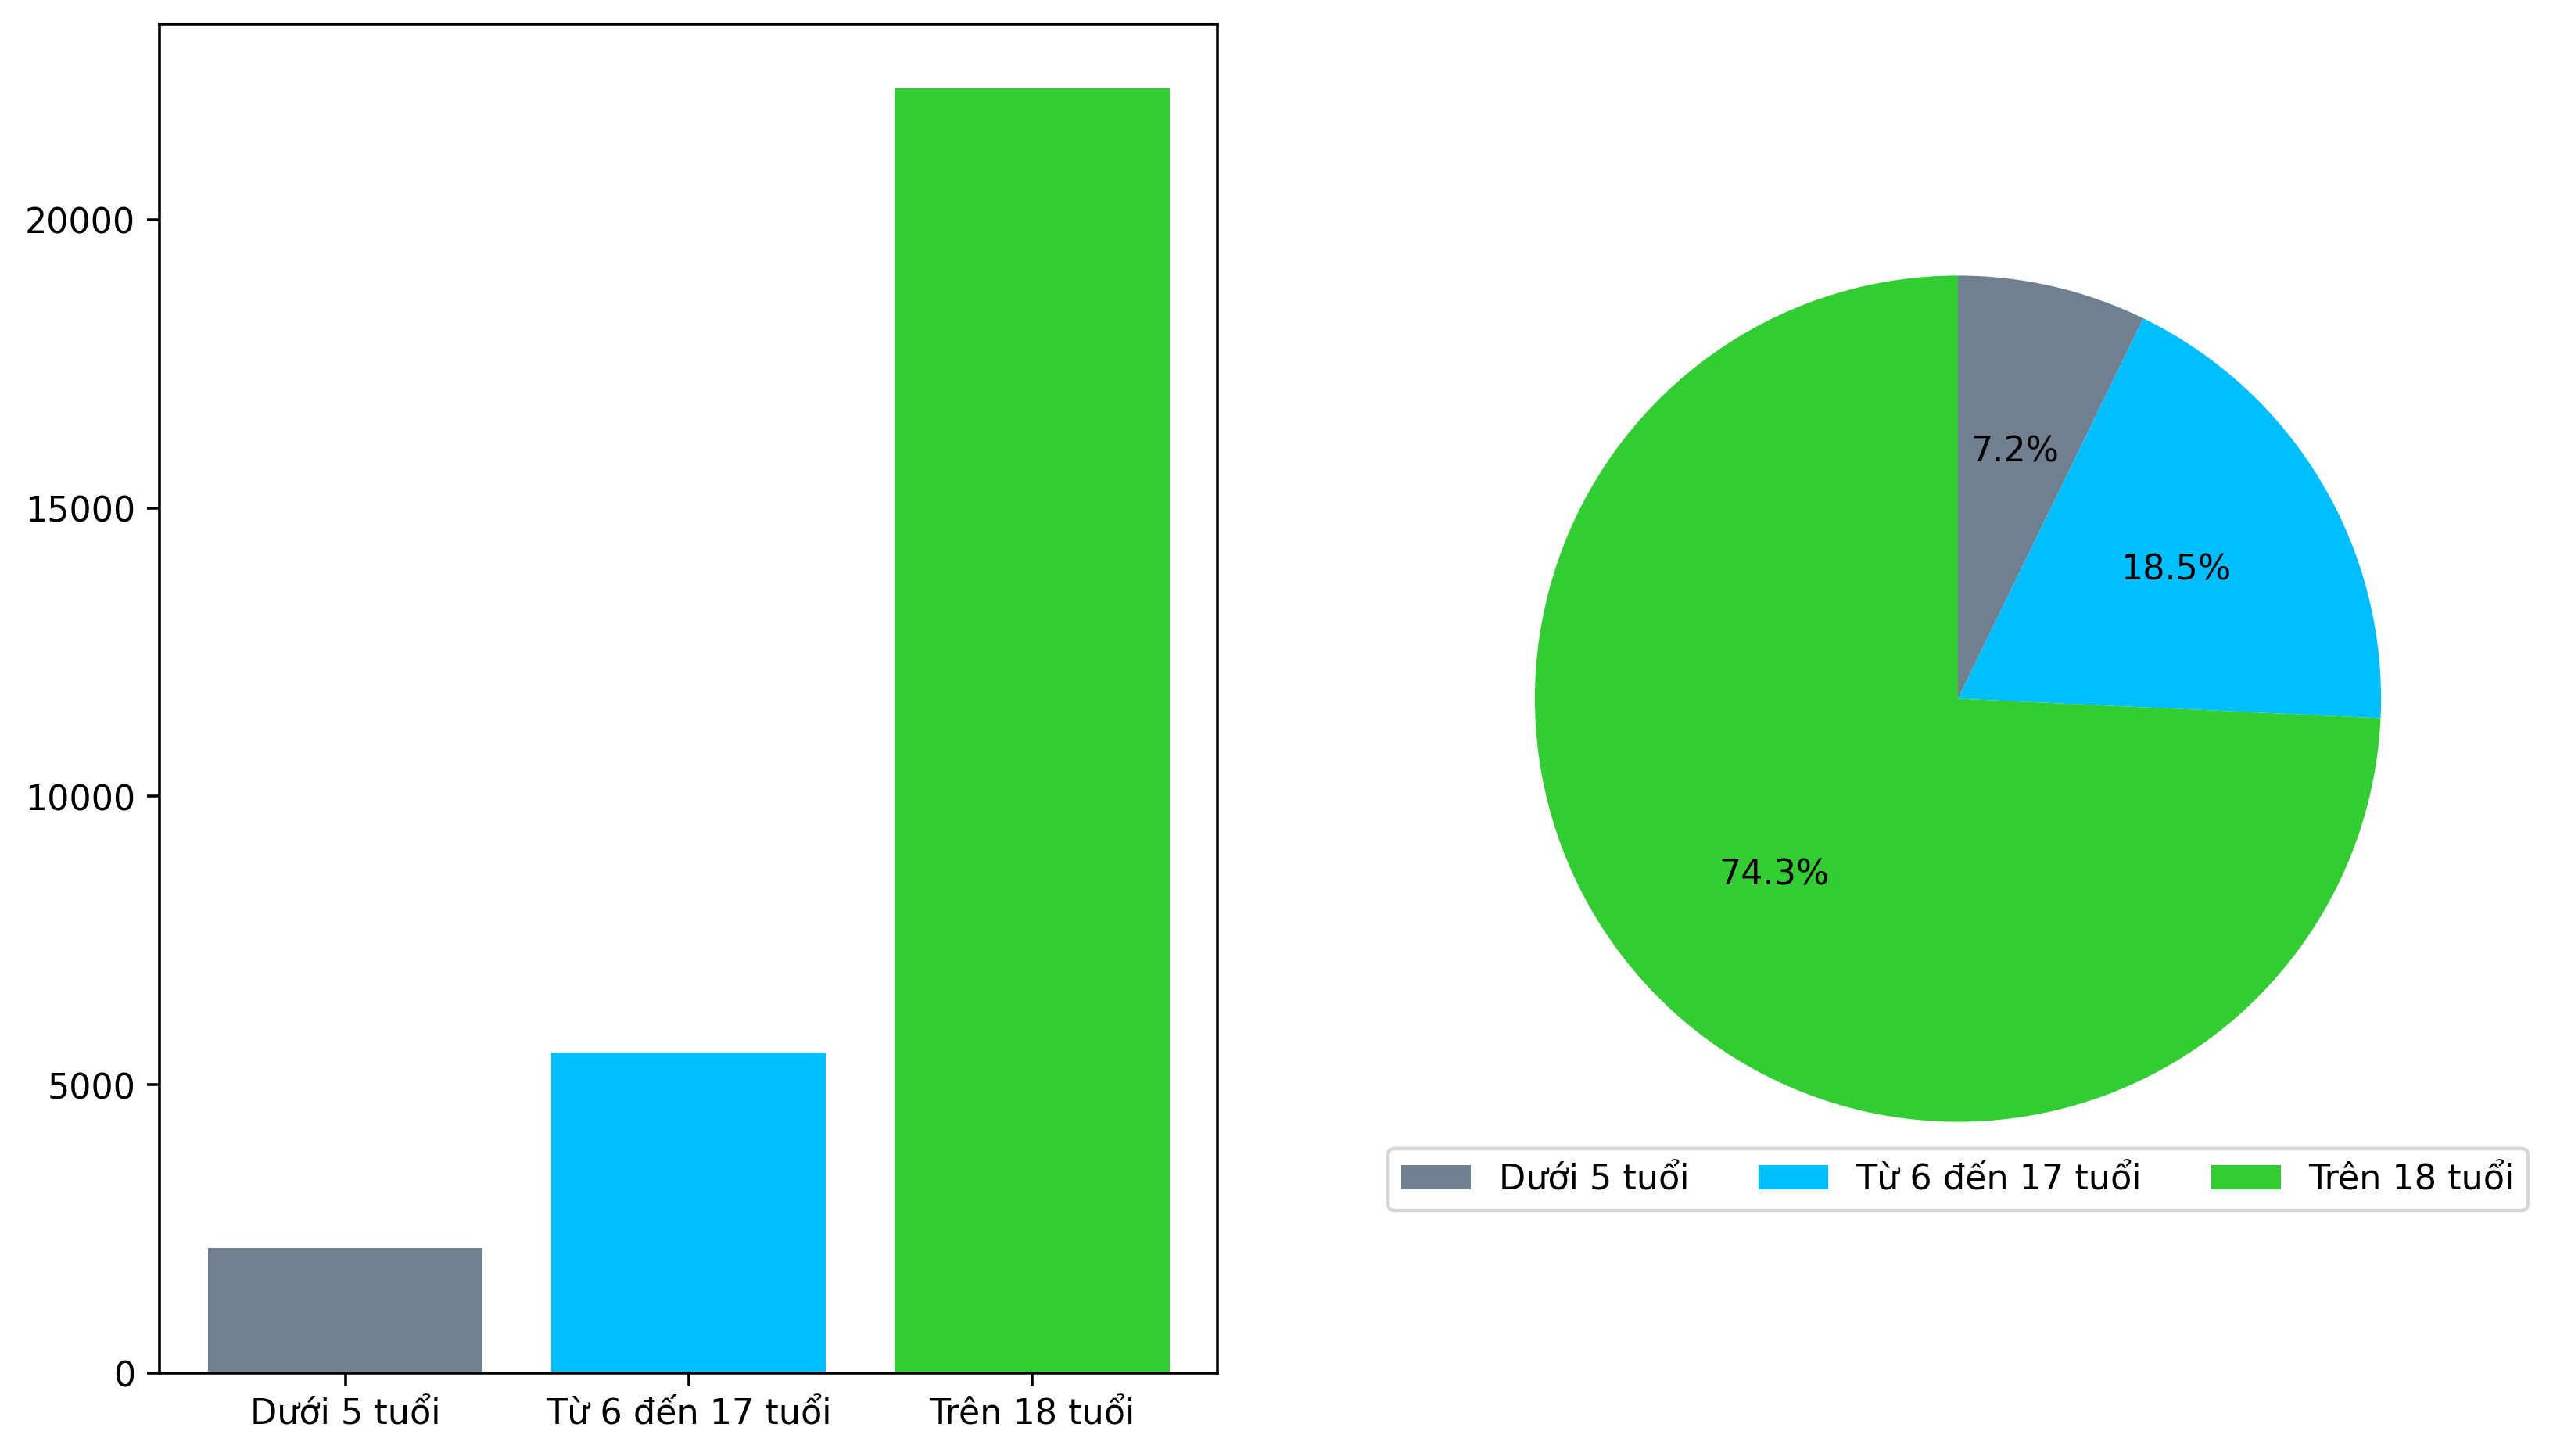

In [8]:
age_count = age_data['bin_age'].value_counts(ascending=True).to_frame(name='value')
age_count['color'] = ['slategray', 'deepskyblue', 'limegreen']

# Plot the bar chart and pie chart in the same subplot for 'age' column
fig, (ax_bar, ax_pie) = plt.subplots(1, 2)
ax_bar.bar(age_count.index, age_count.value, color=age_count['color']);
ax_pie.pie(age_count.value,
           labels=age_count.index, labeldistance=None,
           colors=age_count['color'],
           autopct='%1.1f%%', pctdistance=.6,
           startangle=90, counterclock=False);
ax_pie.legend(loc='lower center', ncol=3);

**Nhận xét**:
- _Sự phân bố_: Hơn $\displaystyle \frac{1}{4}$ (khoảng $25.7\%$) đối tượng thu thập dữ liệu là người dưới 18 tuổi; gần $\displaystyle \frac{3}{4}$ (khoảng $74.3\%$) dữ liệu còn lại có độ tuổi trên 18.
- _Độ tuổi dưới 18_: Trong khoảng $25.7\%$, tỷ lệ trẻ em từ 6 tuổi trở lên, độ tuổi mà trẻ em bắt đầu đi học, gấp 3 lần tỷ lệ trẻ em dưới 6 tuổi. Đây là tỷ lệ vừa đủ để quan tâm đến việc giáo dục trẻ em ở độ tuổi đi học, và có thể đưa ra dự đoán học phí để trẻ em tới trường có làm gánh nặng tài chính đến gia đình hay không.
- _Độ tuổi trên 18_: Trong khoảng $74.3\%$, bao gồm cả những người theo học bậc Đại học/Cao đẳng trở lên và những người không còn đi học (đi làm, hưu trí...). Đây là tỷ lệ phù hợp và đủ lớn để quan sát việc học có ảnh hưởng đến tài chính cá nhân hoặc các hộ gia đình vẫn còn người đi học hay không.

## Độ tuổi dưới 18

In [9]:
# columns = np.array([col for col in all_data.columns if 'instlevel' in col])
# columns = np.append(columns, ['age', 'escolari' ,'rez_esc', 'rez_esc-missing', 'meaneduc'])
# columns

In [10]:
columns = np.array([col for col in all_data.columns if 'instlevel' in col])
columns = np.append(columns, ['age', 'escolari' ,'rez_esc', 'rez_esc-missing'])
columns

array(['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4',
       'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8',
       'instlevel9', 'age', 'escolari', 'rez_esc', 'rez_esc-missing'],
      dtype='<U15')

In [11]:
under_18 = all_data[all_data['age'] < 18][columns].copy()
under_18.sample(5)

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,age,escolari,rez_esc,rez_esc-missing
21441,0,0,1,0,0,0,0,0,0,13,6,0.0,False
13845,0,1,0,0,0,0,0,0,0,11,5,0.0,False
13240,1,0,0,0,0,0,0,0,0,5,0,0.0,False
12870,0,0,0,0,0,1,0,0,0,16,9,0.0,False
21170,0,1,0,0,0,0,0,0,0,8,1,0.0,False


### Quan sát số năm phải hoàn thành ở mỗi bậc giáo dục

In [12]:
under_18_statistical = under_18[['instlevel3', 'instlevel5', 'instlevel7', 'escolari']]
# under_18_statistical = under_18_statistical.multiply(under_18['escolari'], axis=0)
# under_18_statistical = under_18_statistical.apply(lambda col: [col.values], axis=0)
# under_18_statistical = under_18_statistical.apply(lambda col: col * under_18['escolari'], axis=1)
under_18_statistical.columns = ['Primary level', 'Academic secondary level', 'Technical secondary level', 'Total']
under_18_statistical

,Primary level,Academic secondary level,Technical secondary level,Total
3,0,0,0,9
6,0,0,0,2
7,0,0,0,0
10,0,0,0,3
38,0,0,0,8
...,...,...,...,...
29979,0,0,0,0
29982,0,0,0,8
29989,0,0,0,3
29991,0,0,0,4


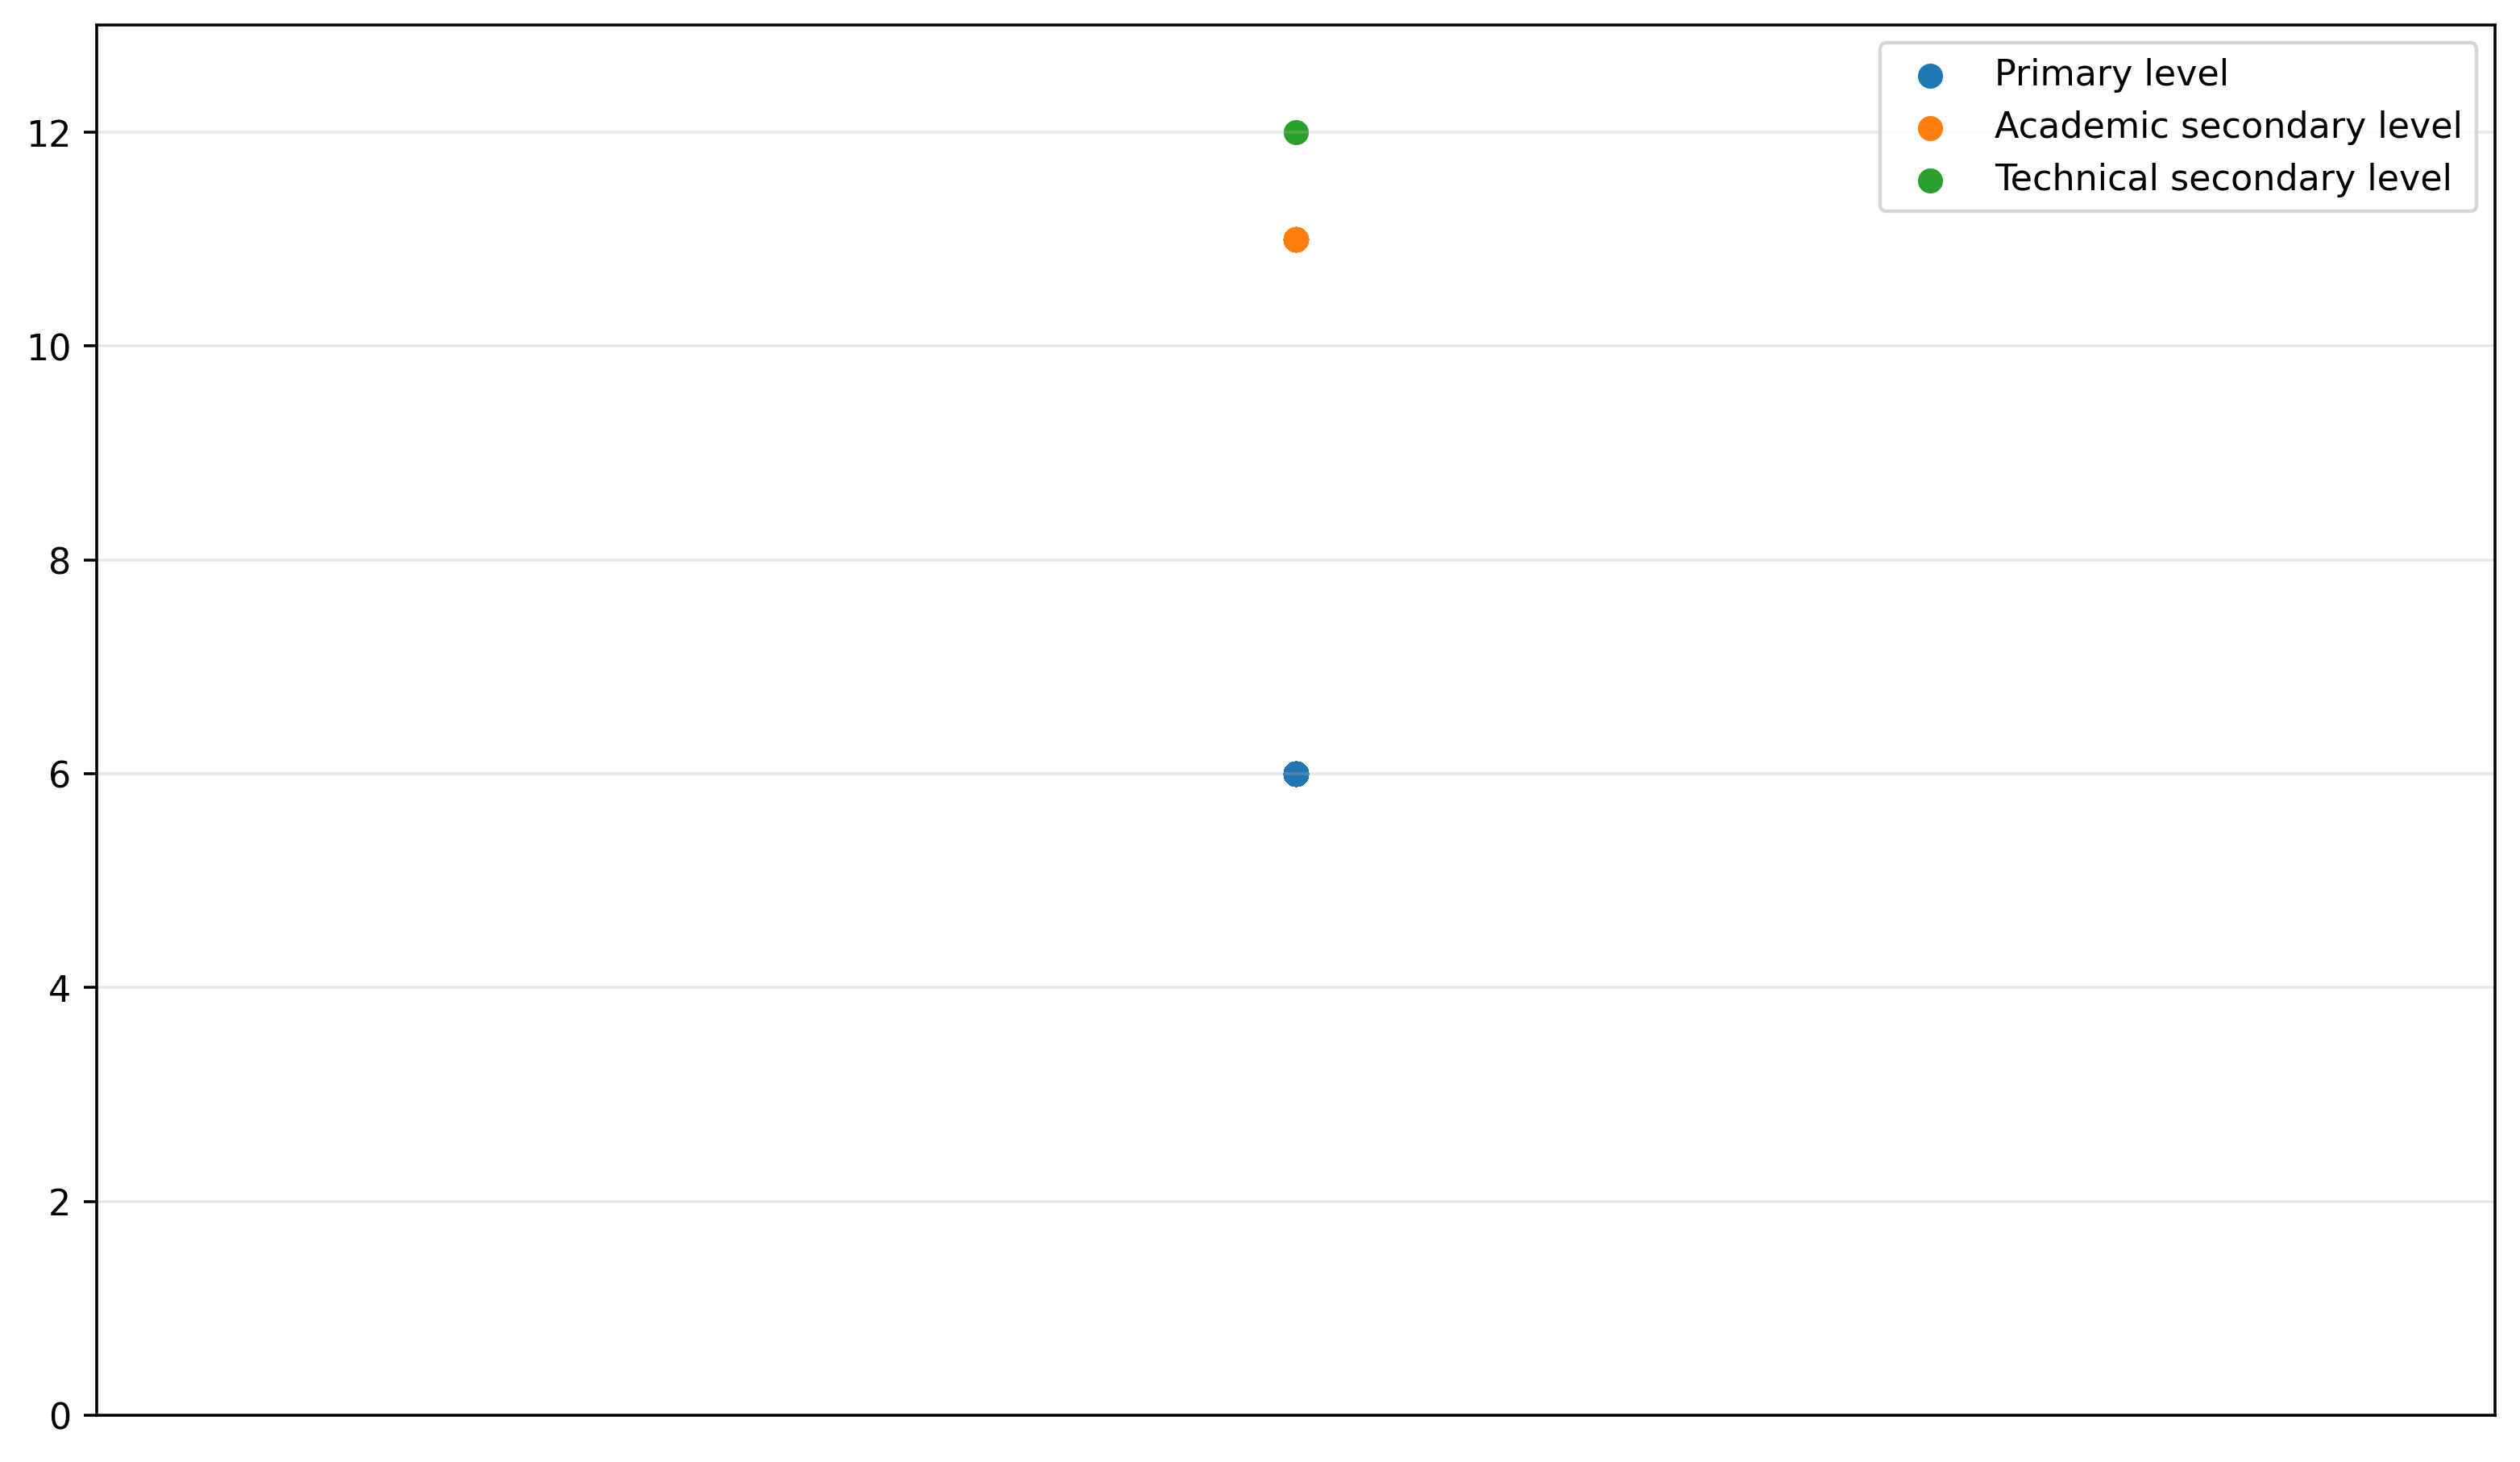

In [13]:
# Plot scatter plot for under_18_statistical
plt.scatter(x=under_18_statistical[under_18_statistical['Primary level'] == 1]['Primary level'],
            y=under_18_statistical[under_18_statistical['Primary level'] == 1]['Total'],
            label='Primary level')
plt.scatter(x=under_18_statistical[under_18_statistical['Academic secondary level'] == 1]['Academic secondary level'],
            y=under_18_statistical[under_18_statistical['Academic secondary level'] == 1]['Total'],
            label='Academic secondary level')
plt.scatter(x=under_18_statistical[under_18_statistical['Technical secondary level'] == 1]['Technical secondary level'],
            y=under_18_statistical[under_18_statistical['Technical secondary level'] == 1]['Total'],
            label='Technical secondary level')
plt.xticks([]);
plt.ylim([0, 13]);
plt.legend();
plt.grid(alpha=0.3);

**Nhận xét**:
Đa số ở mỗi bậc giáo dục đều có số năm hoàn thành duy nhất:
- Primary level: 6 năm đầu tiên;
- Academic secondary level: 5 năm, từ năm thứ 7 đến năm thứ 11;
- Technical secondary level: 1 năm, năm thứ 12.

### Tỷ lệ phổ cập giáo dục trẻ em

Khảo sát trẻ em trong độ tuổi đi học (trên 6 tuổi).

In [14]:
columns = ['age', 'escolari', 'rez_esc', 'instlevel1']

edu_data = under_18[(under_18['rez_esc-missing'] == False) & (under_18['age'] > 6)][columns].astype(int)
edu_data['age'] = edu_data['age'].astype(str)

edu_data.loc[edu_data['rez_esc'] > 0, 'rez_esc'] = 1
edu_data.loc[edu_data['escolari'] > 0, 'escolari'] = 1
edu_data.loc[edu_data['rez_esc'] > 0, 'escolari'] = 0

edu_data.columns = ['Tuổi', 'Đang học', 'Bỏ học', 'Không đi học']
edu_data.sample(5)

,Tuổi,Đang học,Bỏ học,Không đi học
20281,13,1,0,0
9094,9,0,1,0
22374,14,1,0,0
16727,15,1,0,0
19052,10,1,0,0


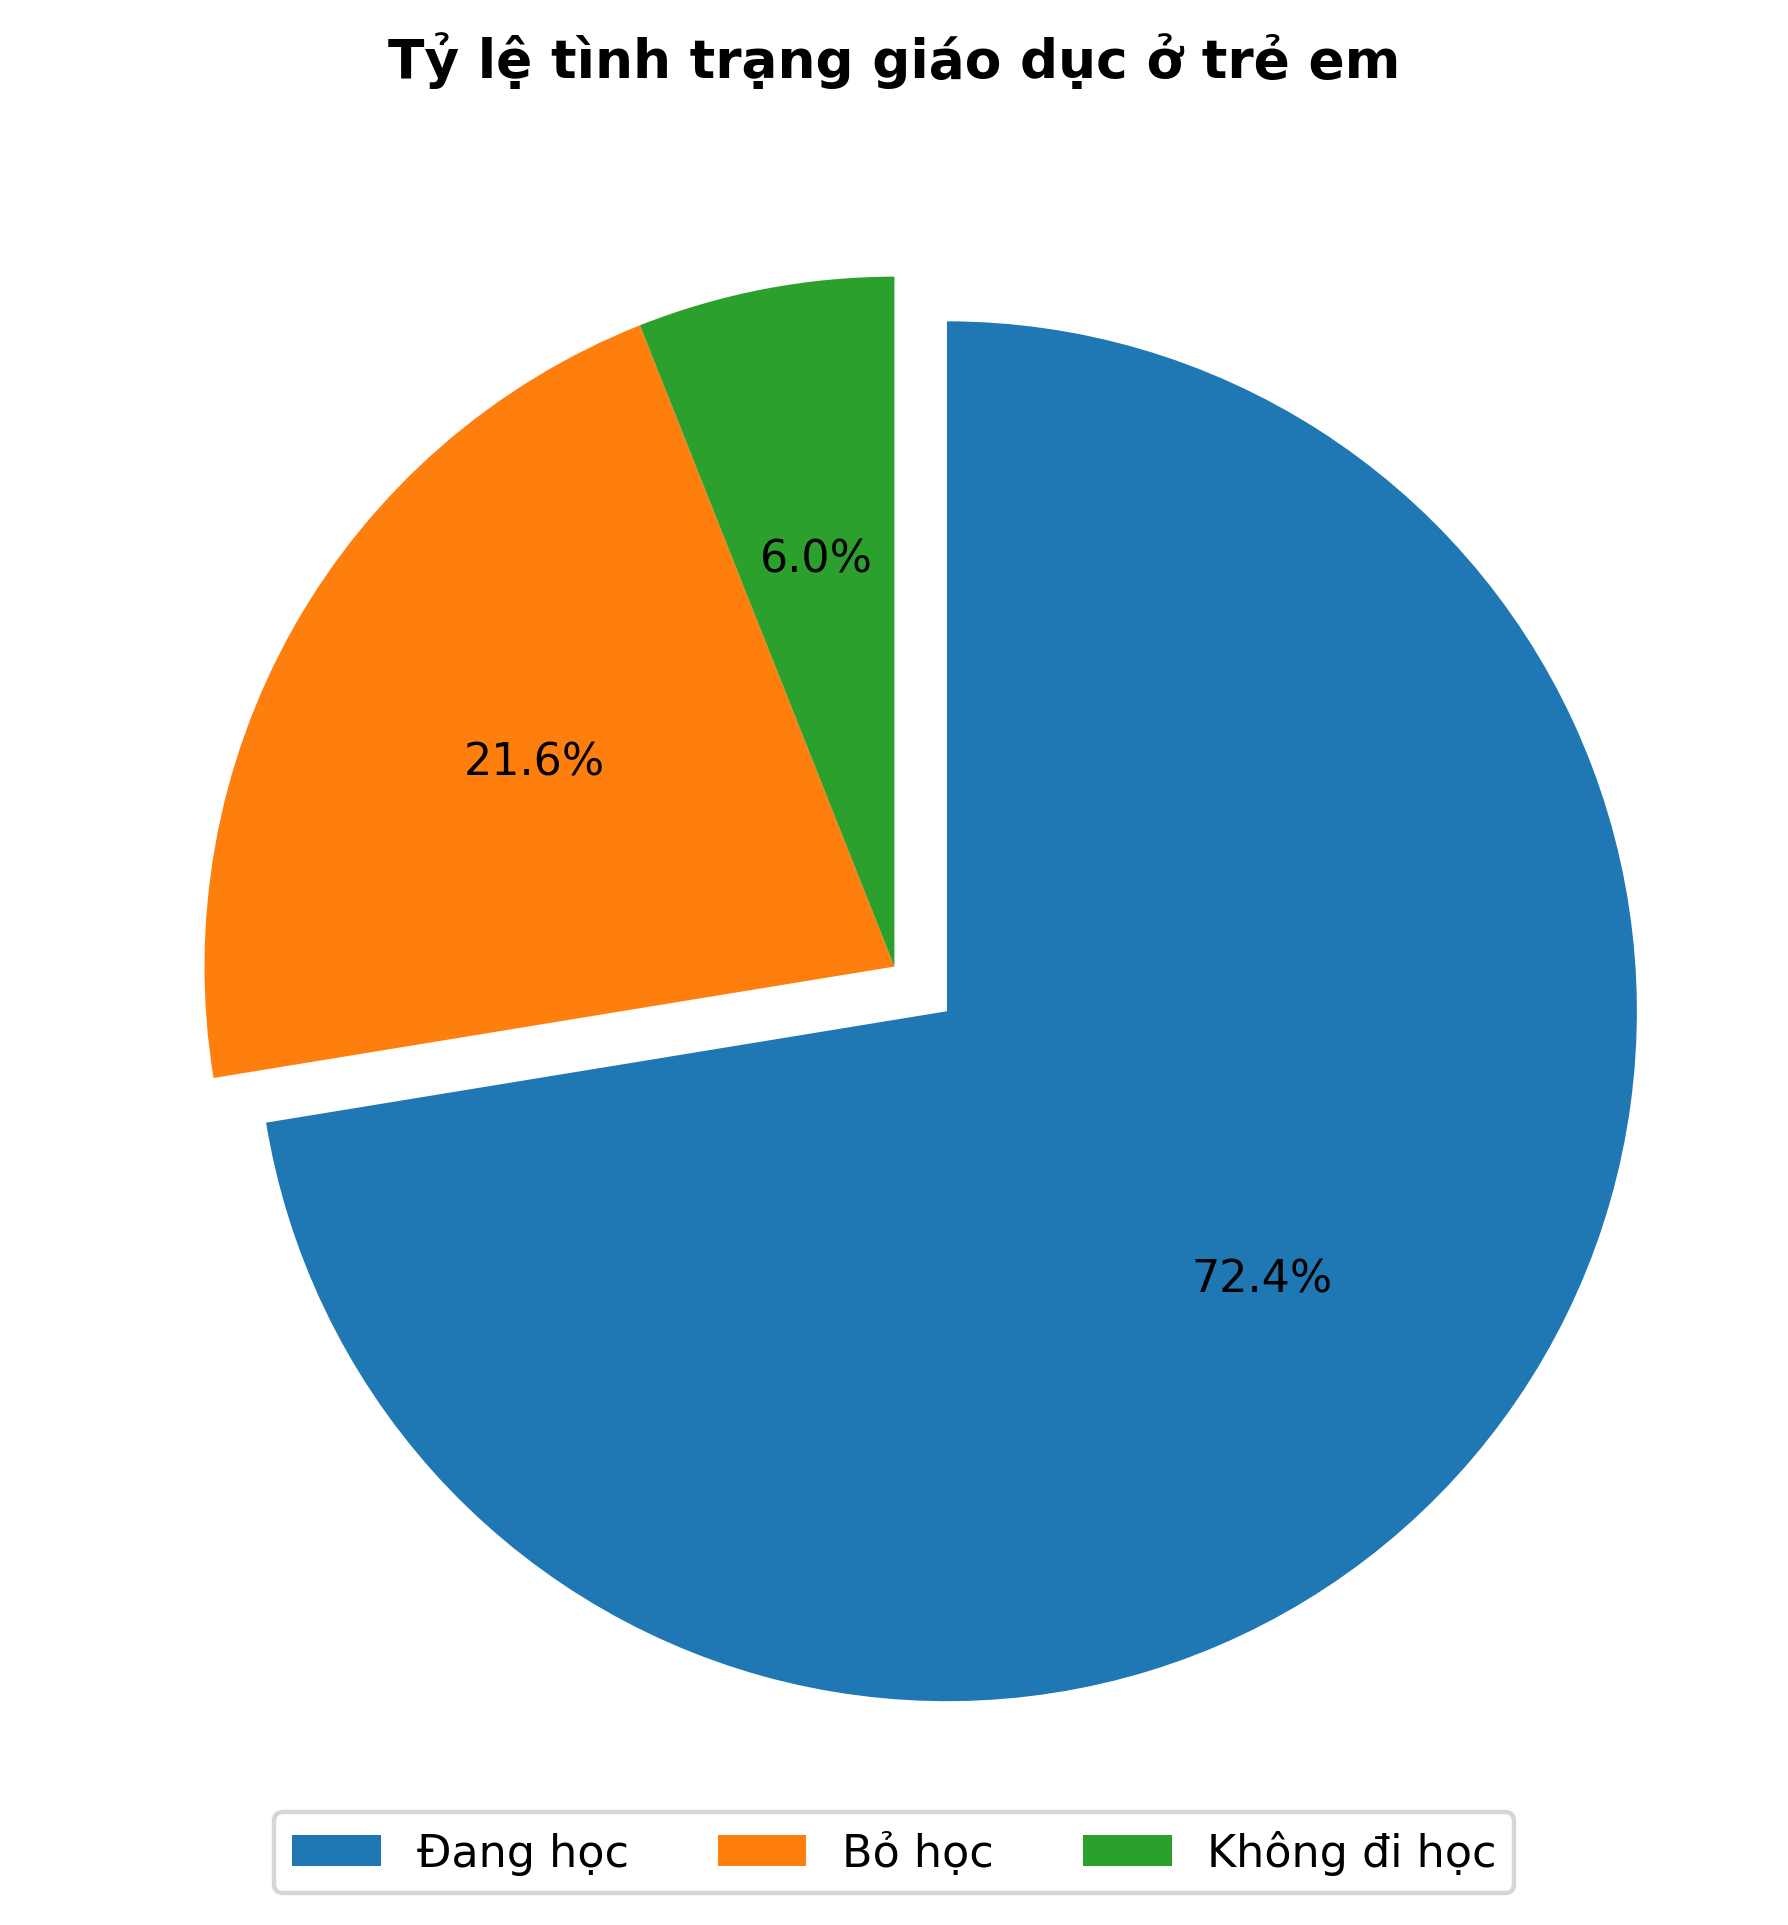

In [15]:
sumary = edu_data.iloc[:, 1:].sum(axis=0)
plt.pie(sumary, explode=[0.1, 0., 0.],
        labels=sumary.index, labeldistance=None,
        autopct='%1.1f%%', pctdistance=.6,
        startangle=90, counterclock=False);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3);
plt.title('Tỷ lệ tình trạng giáo dục ở trẻ em', fontdict={'weight':'bold'});
plt.subplots_adjust()

Quan sát số lượng dữ liệu ở từng độ tuổi.

In [16]:
age_count = edu_data['Tuổi'].value_counts()
age_count

16    560
17    535
13    479
12    473
15    468
10    465
9     454
8     449
14    447
7     418
11    376
Name: Tuổi, dtype: int64

In [17]:
# Group by 'age' and calculate the sum for all columns
group_age = edu_data.groupby('Tuổi').sum()
group_age = group_age.divide(age_count, axis=0)
group_age

,Đang học,Bỏ học,Không đi học
10,0.864516,0.122581,0.012903
11,0.861702,0.135638,0.002660
12,0.820296,0.169133,0.010571
13,0.841336,0.154489,0.004175
14,0.758389,0.239374,0.002237
15,0.638889,0.356838,0.004274
16,0.544643,0.451786,0.003571
17,0.446729,0.542056,0.011215
7,0.363636,0.000000,0.636364
8,0.966592,0.000000,0.031180


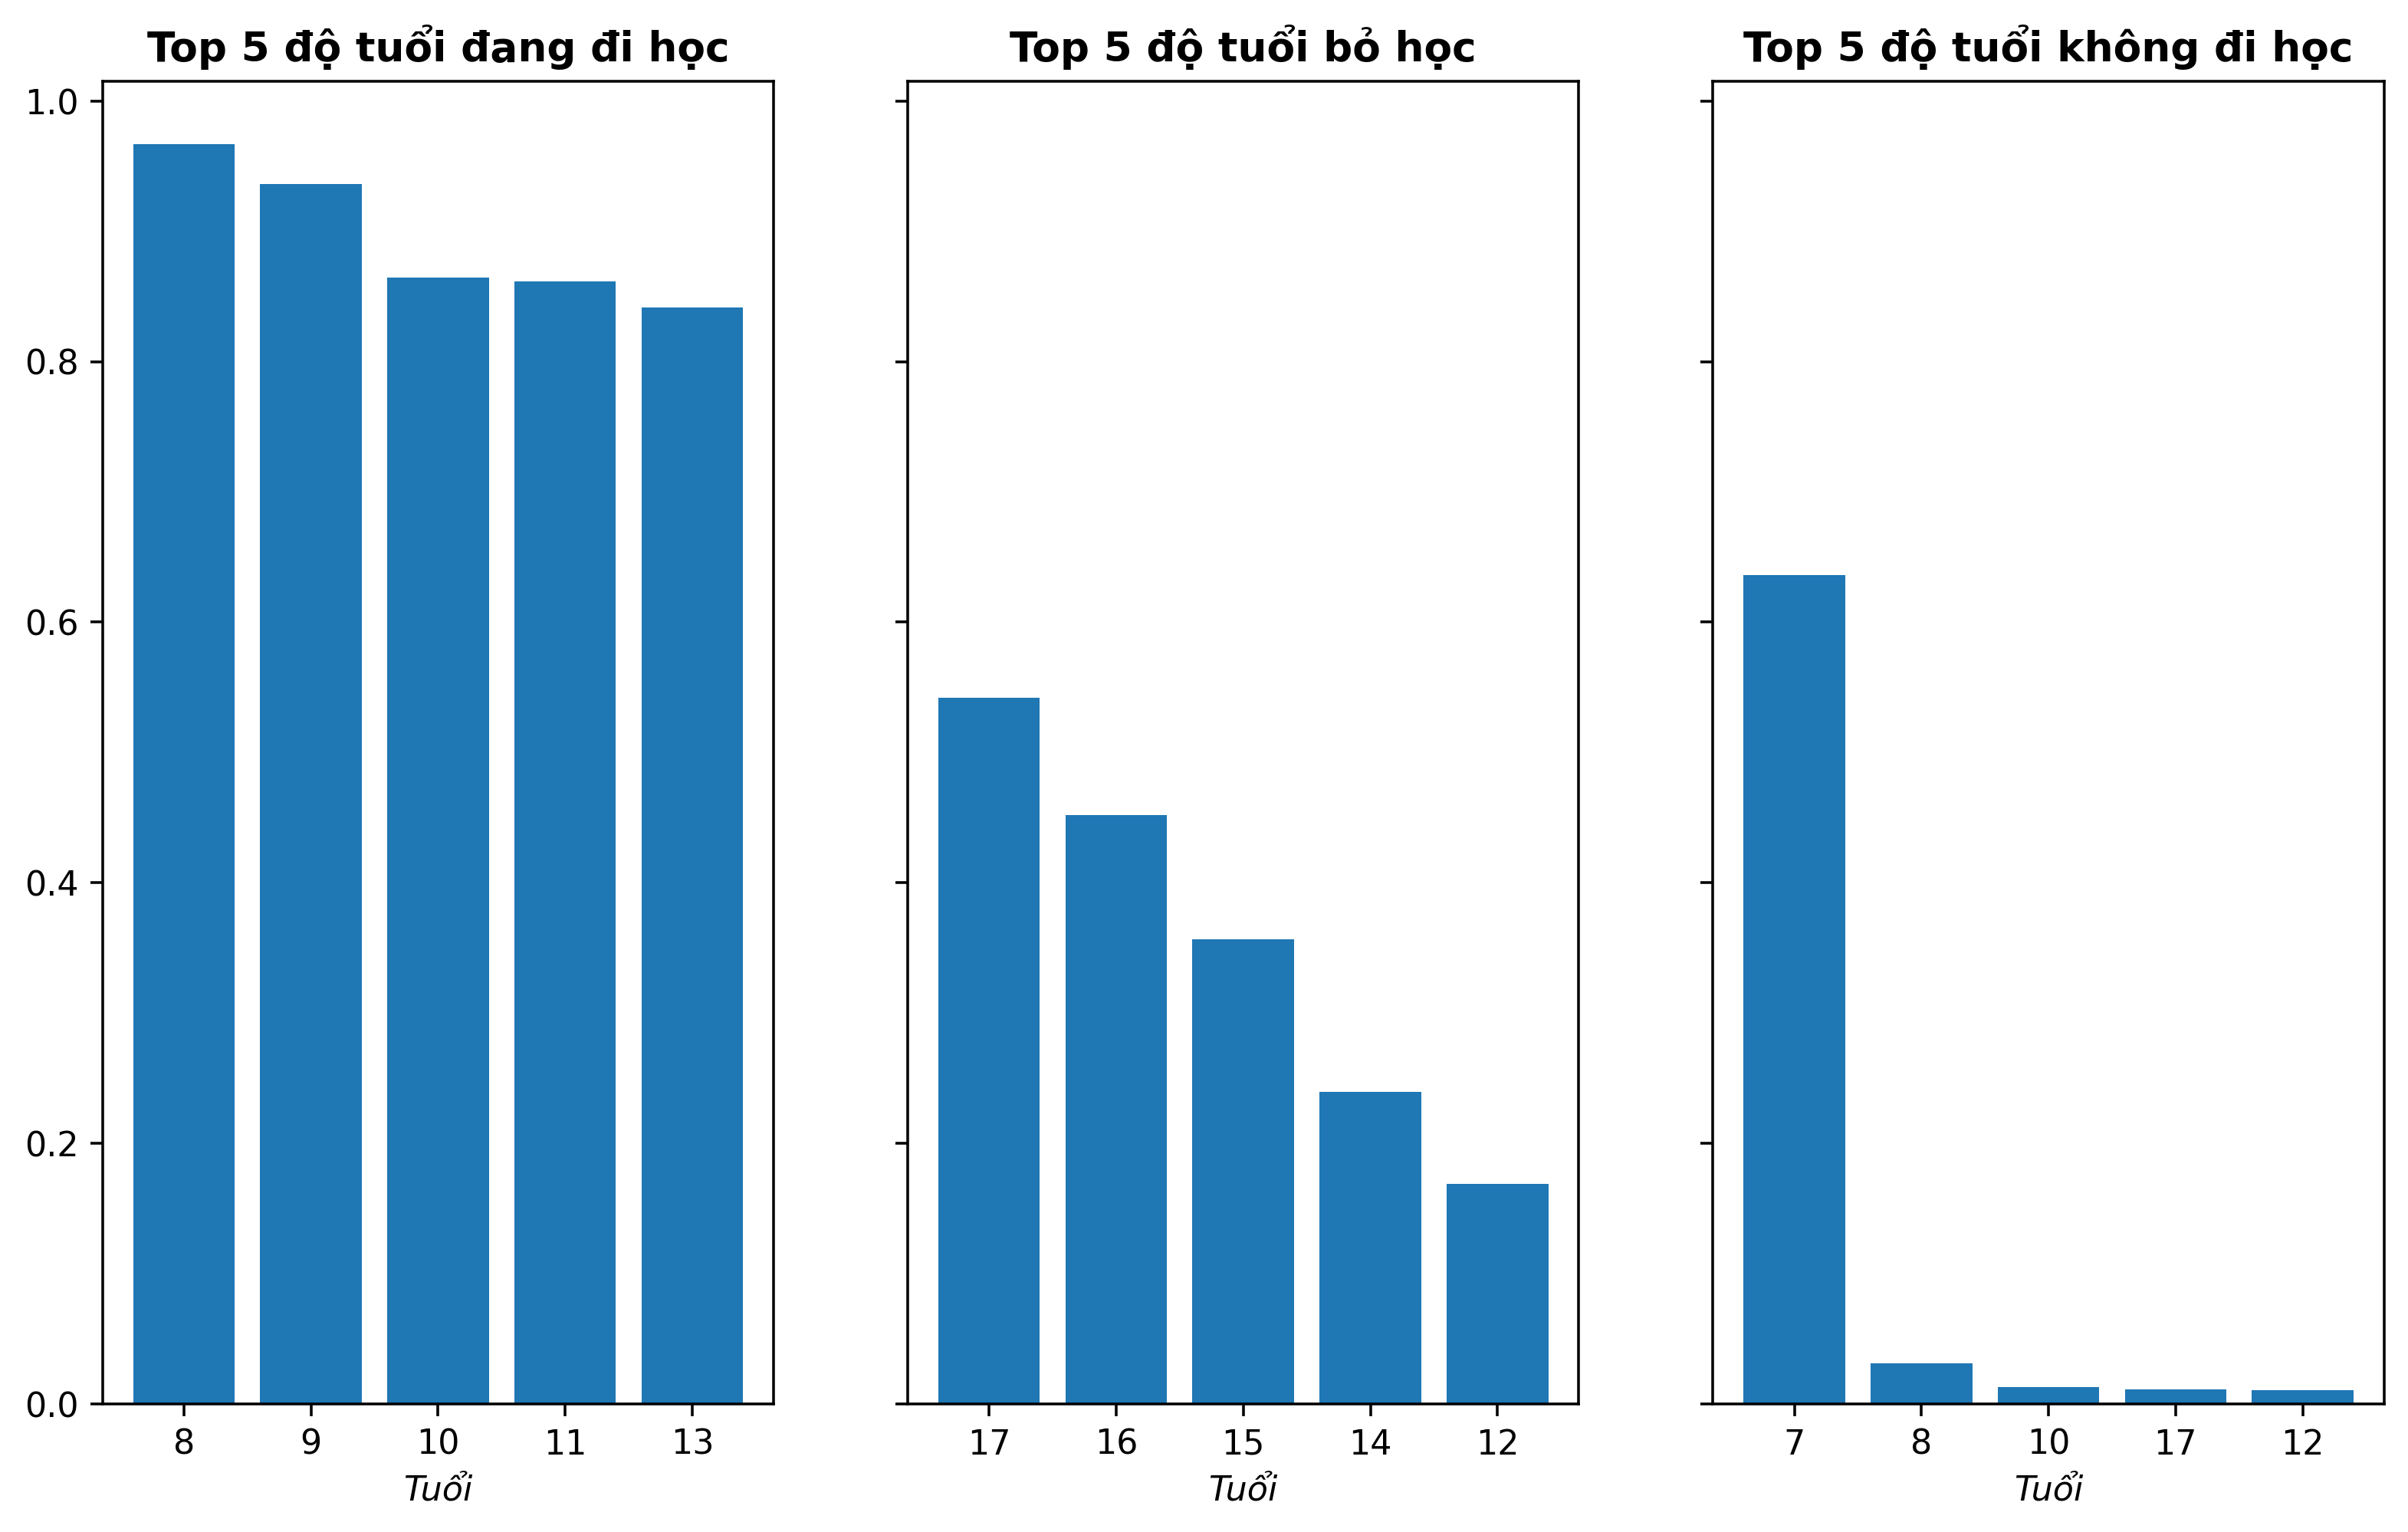

In [18]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(1, 3, sharey=[0,1])

top5 = group_age.sort_values(by='Đang học', ascending=False).head(5)
ax_1.bar(top5.index, top5['Đang học'])
ax_1.set_title("Top 5 độ tuổi đang đi học", fontdict={'weight':'bold'});
ax_1.set_xlabel("Tuổi", fontdict={'style':'italic'});

top5 = group_age.sort_values(by='Bỏ học', ascending=False).head(5)
ax_2.bar(top5.index, top5['Bỏ học'])
ax_2.set_title("Top 5 độ tuổi bỏ học", fontdict={'weight':'bold'});
ax_2.set_xlabel("Tuổi", fontdict={'style':'italic'});

top5 = group_age.sort_values(by='Không đi học', ascending=False).head(5)
ax_3.bar(top5.index, top5['Không đi học'])
ax_3.set_title("Top 5 độ tuổi không đi học", fontdict={'weight':'bold'});
ax_3.set_xlabel("Tuổi", fontdict={'style':'italic'});


**Nhận xét**:
- Mặc dù tỷ lệ trẻ em được đi học chiếm gần $\displaystyle \frac{3}{4}$ (khoảng $72.4\%$) nhưng phần còn lại cho thấy tỷ lệ trẻ em từ bỏ việc học hoặc không đi học cũng không nhỏ. Cứ 4 trẻ em thì có 1 trẻ em bỏ học hoặc không đi học.
- Số lượng trẻ đi học nhiều nhất rơi vào những độ tuổi đã ổn định về mặt tinh thần (trẻ không bị hoảng sợ khi phải thay đổi môi trường mới, phụ huynh lo ngại về tài chính khi cho cọn đi học...).
- Trẻ em 7 tuổi là đối tượng nổi bật trong việc chưa đi học, có thể các hộ gia đình lo lắng về tài chính hoặc có những phong tục lạc hậu..., ngoài ra còn có các độ tuổi khác cũng nằm trong top 5 này là 8, 10, 17...
- Trẻ em bỏ việc học xuất hiện nhiều ở độ tuổi từ 14 đến 17, đây là độ tuổi thay đổi về tâm sinh lý học, dễ bị tác động đến suy nghĩ và tinh thần bởi những yếu tố bên ngoài; hoặc do tâm lý các hộ gia đình về vấn đề tài chính khiến chưa có suy nghĩ đúng đắn về việc giáo dục cho con em mình.

## Độ tuổi trên 18

In [19]:
over_18 = all_data[all_data['age'] >= 18].copy()

Quan sát tỷ lệ hoàn thành chương trình giáo dục phổ thông.

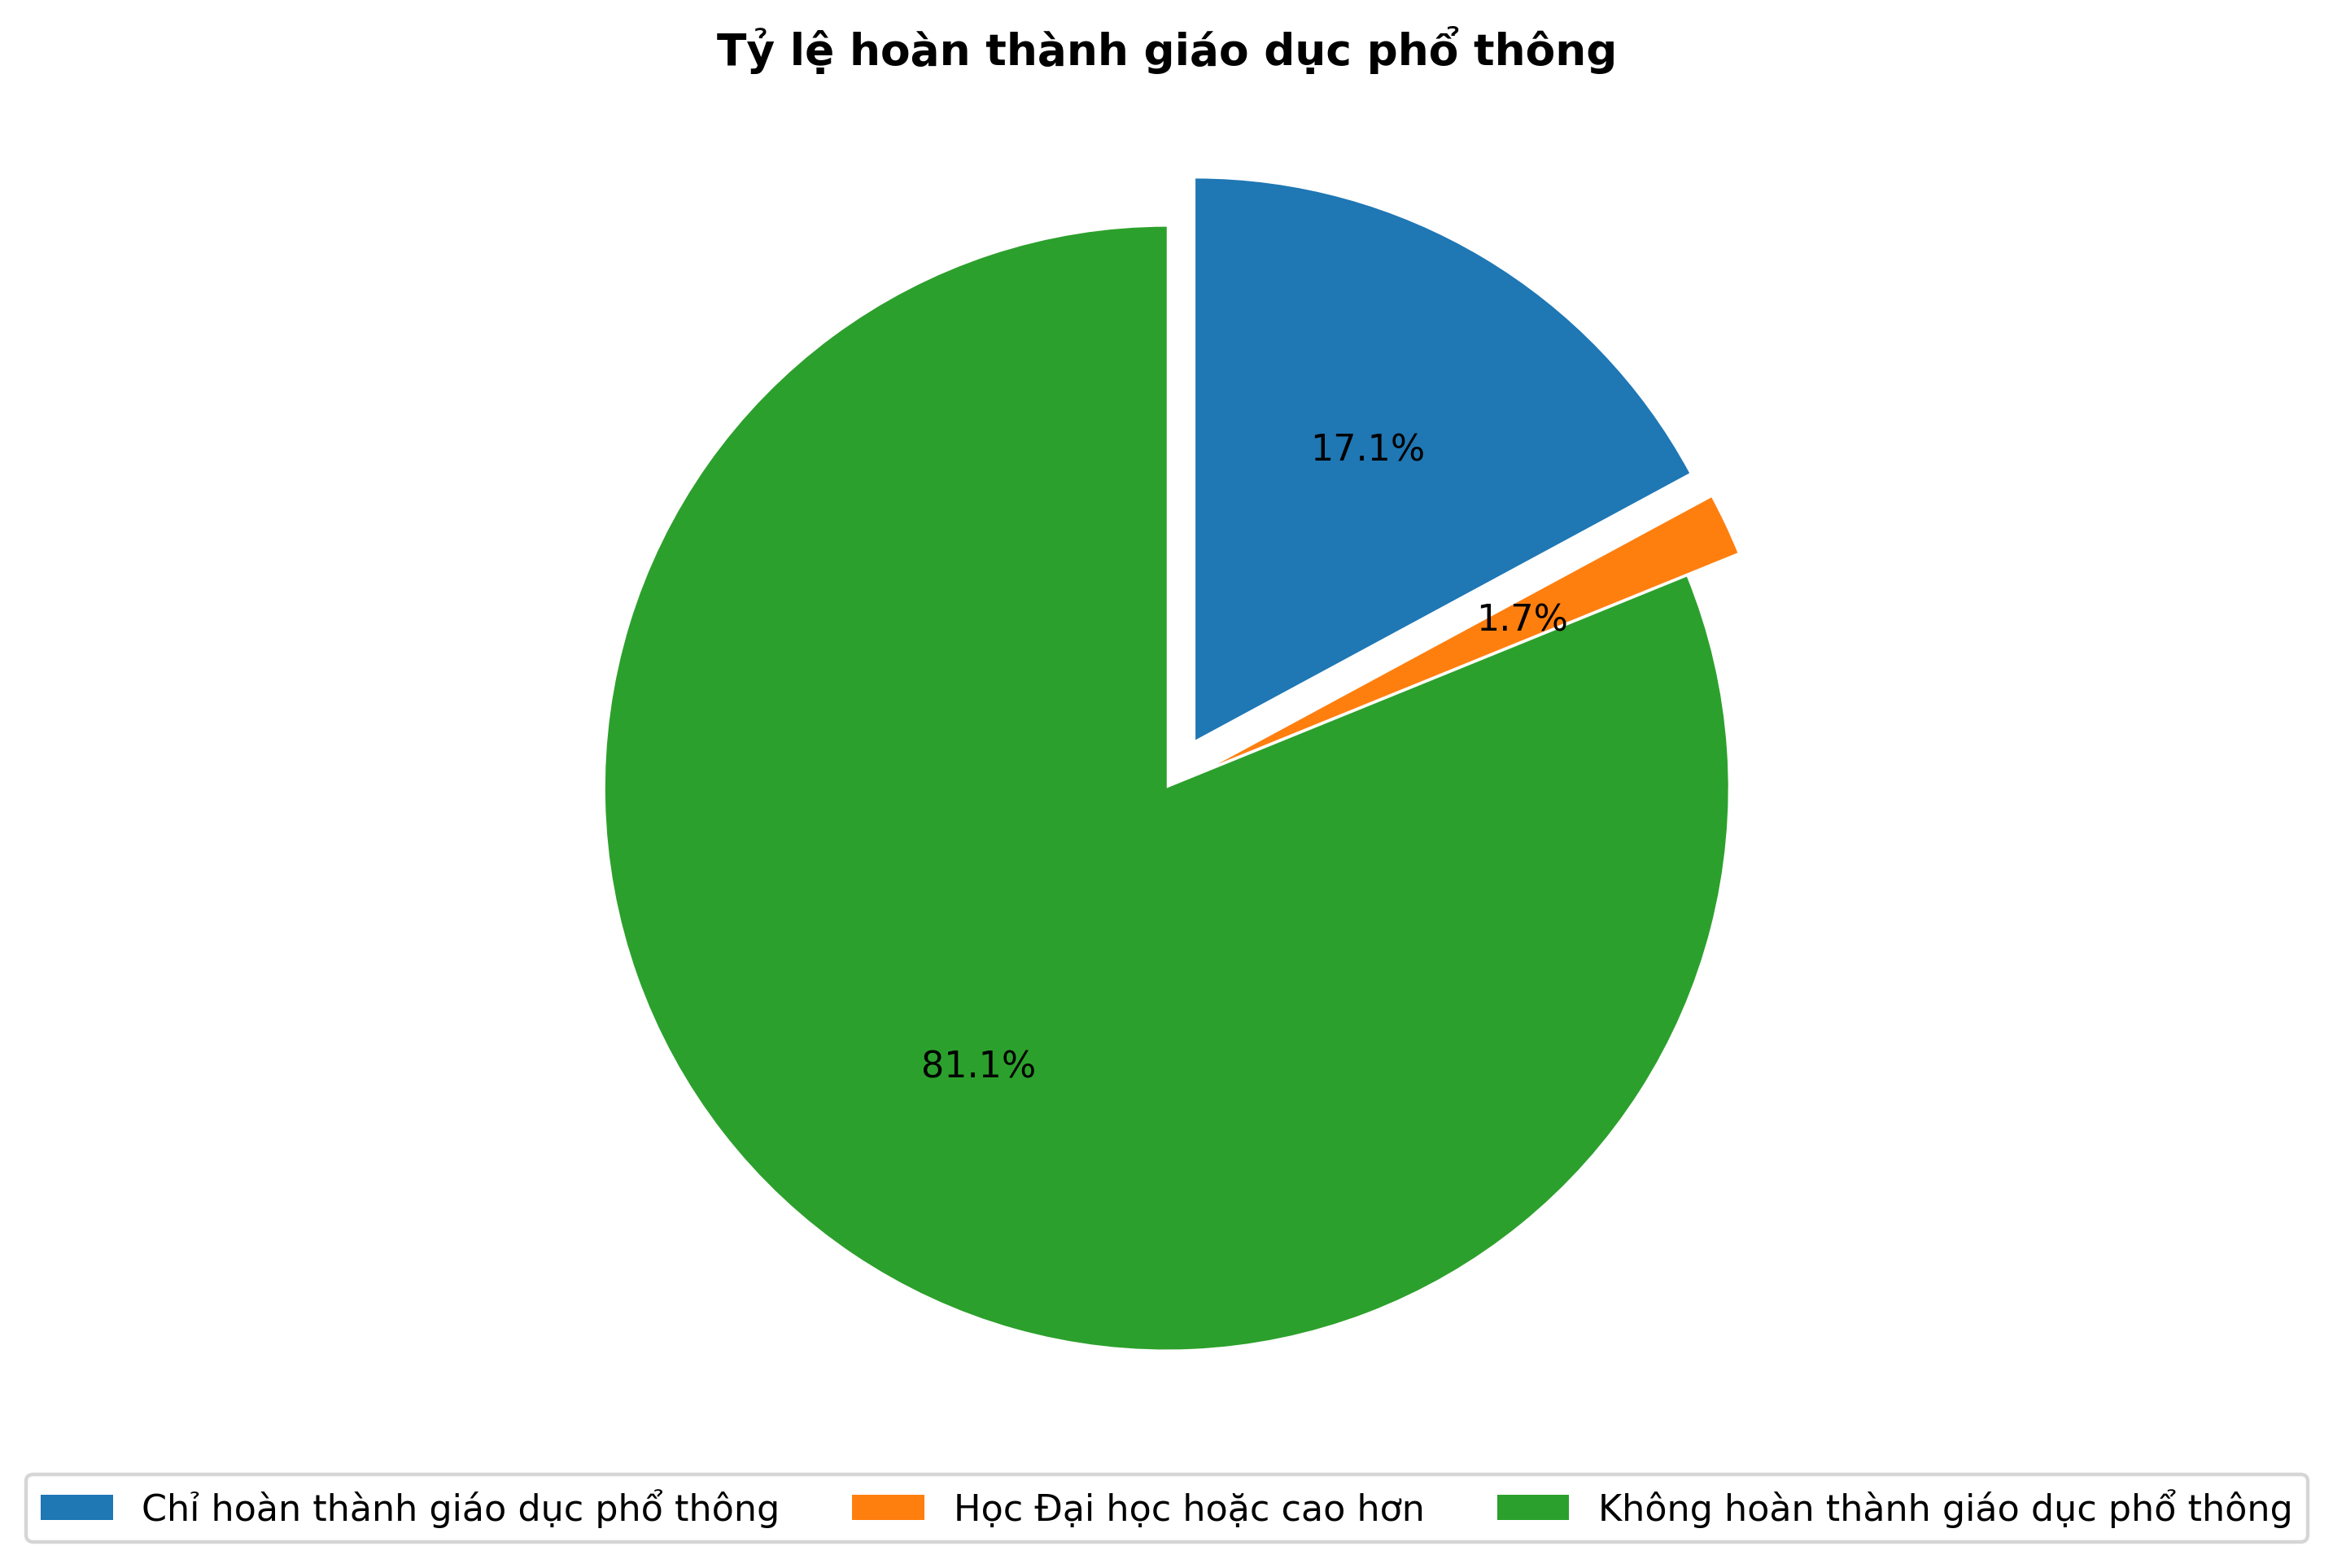

In [20]:
columns = ['instlevel7', 'instlevel8', 'instlevel9']
complete = over_18[columns[1:]].sum(axis=0)
non_complete = over_18.loc[over_18['instlevel7'] == 0, 'instlevel7'].count()

plt.pie([complete['instlevel8'], complete['instlevel9'], non_complete], explode=[0.1, 0.1, 0.],
        labels=['Chỉ hoàn thành giáo dục phổ thông', 'Học Đại học hoặc cao hơn', 'Không hoàn thành giáo dục phổ thông'], labeldistance=None,
        autopct='%1.1f%%', pctdistance=.6,
        startangle=90, counterclock=False);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3);
plt.title('Tỷ lệ hoàn thành giáo dục phổ thông', fontdict={'weight':'bold'});

**Nhận xét**:
- Tỷ lệ hoàn thành giáo dục phổ thông ở người trên 18 tuổi khá thấp, chỉ khoảng gần $20\%$, cứ 5 người mới có 1 người hoàn thành giáo dục phổ thông. Có thể thấy rằng điều kiện để người dân tiếp cận việc học đang còn gặp khó khăn.
- Tỷ lệ học tiếp tục Đại học hoặc cao hơn chiếm tỷ lệ rất nhỏ. Điều này cho thấy phần lớn người dân quan niệm việc học chưa thật sự quan trọng, hoặc tài chính của họ không cho phép để học cao hơn.